# Ijsselmeer data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
n_rows = 1000 # None if not limited 

## Discharge and water level data

### Download data
Data can be downloaded from the Rijkswaterstaat data portal at [waterinfo.rws.nl](). Select 
* discharge (*water afvoer*, in Dutch)
* water levels (*waterhoogste*, in Dutch)

at the station of interest (see below), for the availabe period. 

### Load data

In [176]:
raw_discharge = pd.read_csv('../data/Ijsselmeer/discharges.csv',\
                                 encoding='latin-1',\
                                 usecols=['MEETPUNT_IDENTIFICATIE','WAARNEMINGDATUM','WAARNEMINGTIJD','NUMERIEKEWAARDE'],\
                                 sep=';',\
                                 decimal=',',\
                                 na_values='99999900000000000000000000000000000000',\
                                 parse_dates=[['WAARNEMINGDATUM','WAARNEMINGTIJD']],\
                                 dayfirst=True,\
                                 low_memory=False)
                                    

In [180]:
raw_discharge.columns = ['Time','Station','Value']

Shaping data in the right format

In [181]:
discharge = raw_discharge.pivot_table(index='Time',columns='Station',values='Value')
discharge.head()

Station,Den Oever buiten,Houtrib noord,Kampen,Kornwerderzand buiten,Krabbersgat noord,Lobith,"Meppelerdiep ,kilometer 2.5",Olst,Roggebotsluis noord,Roggebotsluisspuikoker,"genemuiden, de ketting"
Time,,,,,,,,,,,
1901-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,2035.0,NaN,NaN,NaN,NaN,NaN
1901-01-02 08:00:00,NaN,NaN,NaN,NaN,NaN,2270.0,NaN,NaN,NaN,NaN,NaN
1901-01-03 08:00:00,NaN,NaN,NaN,NaN,NaN,2445.0,NaN,NaN,NaN,NaN,NaN
1901-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN,2325.0,NaN,NaN,NaN,NaN,NaN
1901-01-05 08:00:00,NaN,NaN,NaN,NaN,NaN,2175.0,NaN,NaN,NaN,NaN,NaN


Resampling at the hourly time step

Visualizing the discharge data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1152490f0>,
      dtype=object)

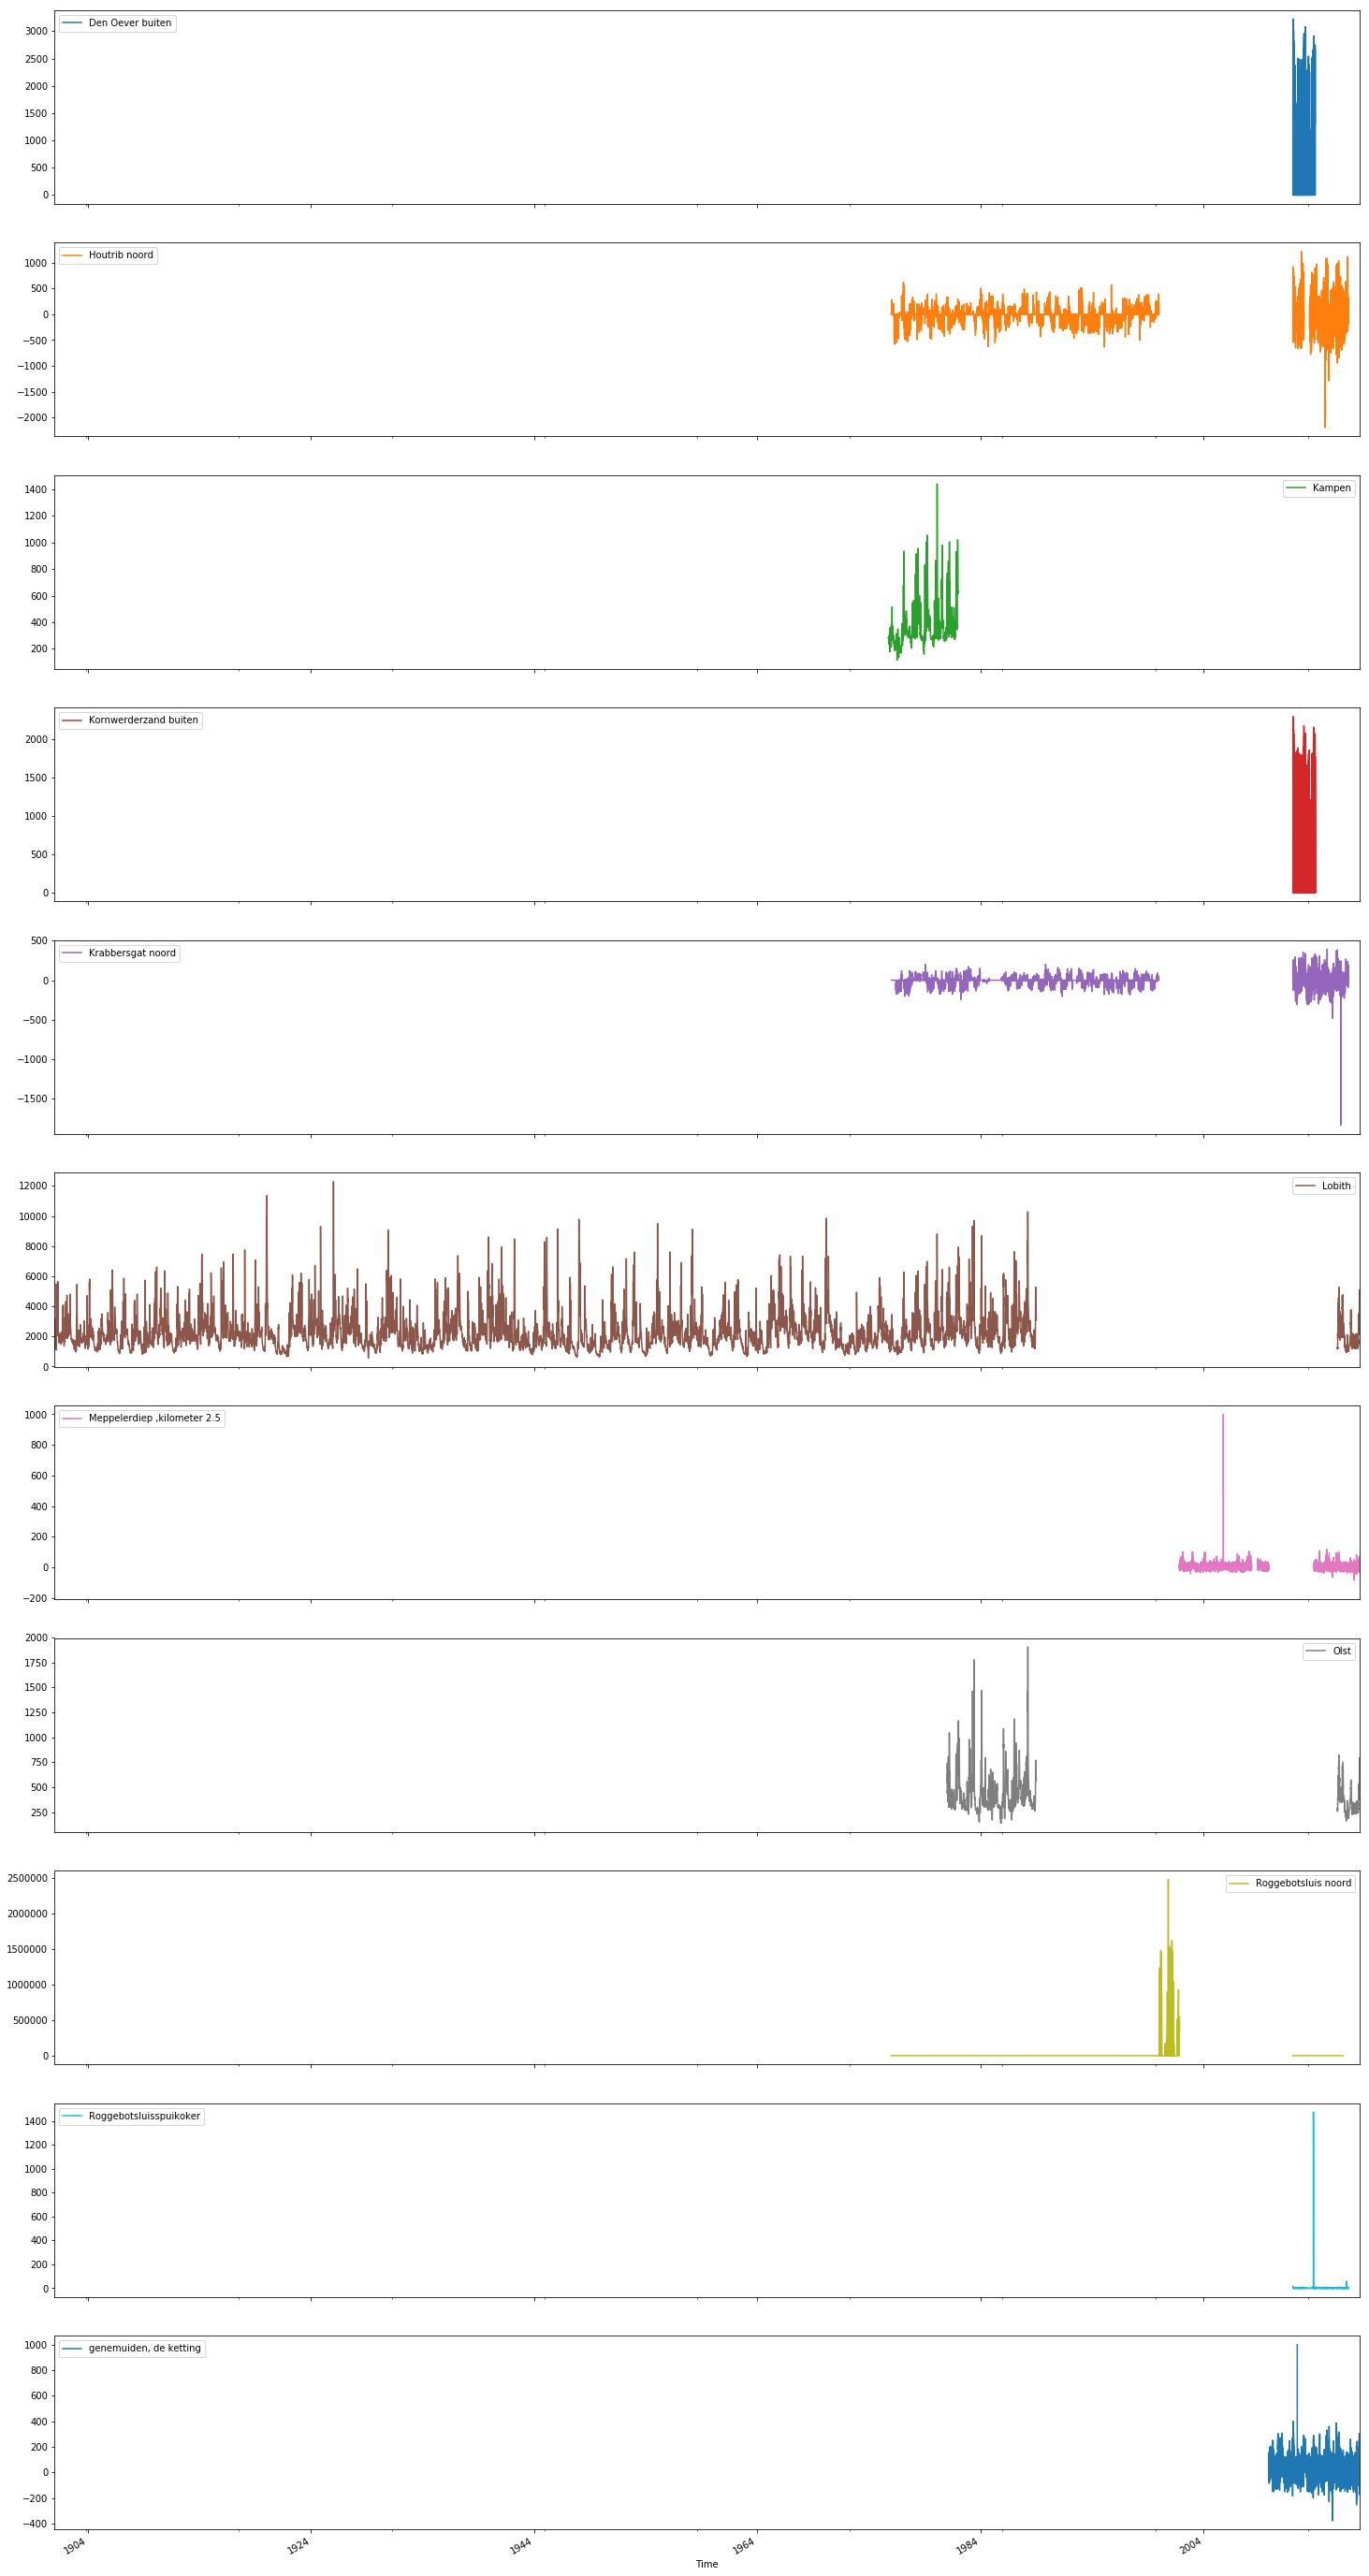

In [179]:
discharge.plot(figsize=(25,5*len(discharge.columns)),subplots=True)

### From Excel 4TU data repository

In [232]:
discharge_lobith = pd.read_excel('../data/Ijsselmeer/Lobith.xlsx',header=40,usecols=[0,3],parse_dates=[0],index_col=0)

In [262]:
discharge_lobith_h = discharge_lobith.resample('H').bfill()
inflow_ijssel_h = discharge_lobith_h * 0.20
inflow_ijssel_h.columns = ['inflow ijssel']

#### Sea water level

In [ ]:
raw_discharge = pd.read_csv('../data/Ijsselmeer/water_levels.csv',\
                                 encoding='latin-1',\
                                 usecols=['MEETPUNT_IDENTIFICATIE','WAARNEMINGDATUM','WAARNEMINGTIJD','NUMERIEKEWAARDE'],\
                                 sep=';',\
                                 decimal=',',\
                                 na_values='99999900000000000000000000000000000000',\
                                 parse_dates=[['WAARNEMINGDATUM','WAARNEMINGTIJD']],\
                                 dayfirst=True,\
                                 low_memory=False,\
                                 nrows=n_rows)
                                    

In [86]:
raw_waterlevel.columns = ['Time','Station','Value']

In [87]:
raw_waterlevel['Value'] = raw_waterlevel['Value']/100 # from cm to meters

In [88]:
waterlevel = raw_waterlevel.pivot_table(index='Time', columns='Station', values='Value')

In [119]:
waterlevel.head(10)

Station,Den Helder,Den Oever buiten
Time,,
1921-01-01 02:40:00,NaN,0.32
1921-01-01 05:40:00,NaN,-0.24
1921-01-01 08:40:00,NaN,-0.49
1921-01-01 11:40:00,NaN,0.09
1921-01-01 14:40:00,NaN,0.23
1921-01-01 17:40:00,NaN,-0.20
1921-01-01 20:40:00,NaN,-0.42
1921-01-01 23:40:00,NaN,0.36
1921-01-02 02:40:00,NaN,0.62


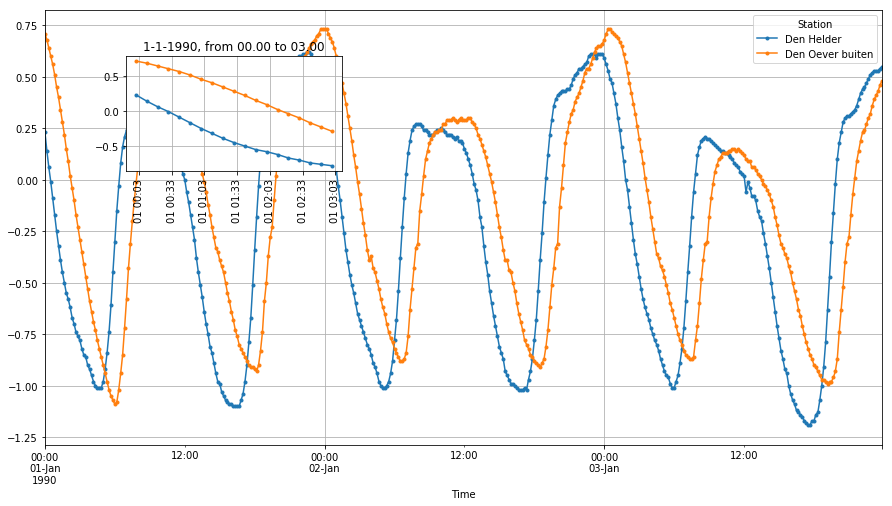

In [97]:
waterlevel['1-1-1990':'1-3-1990'].plot(marker='.',figsize=(15,8))
plt.grid(True)
plt.axes([.2, .6, .2, .2])
plt.plot(waterlevel['1-1-1990 00:00:00':'1-1-1990 03:00:00'],marker='.')
plt.title('1-1-1990, from 00.00 to 03.00')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.savefig('../figures/water_levels_10mins.tiff')

In [302]:
waterlevel_h = waterlevel.resample('H',base=0).bfill()
waterlevel_h.to_csv('hourly_sea_level.csv')

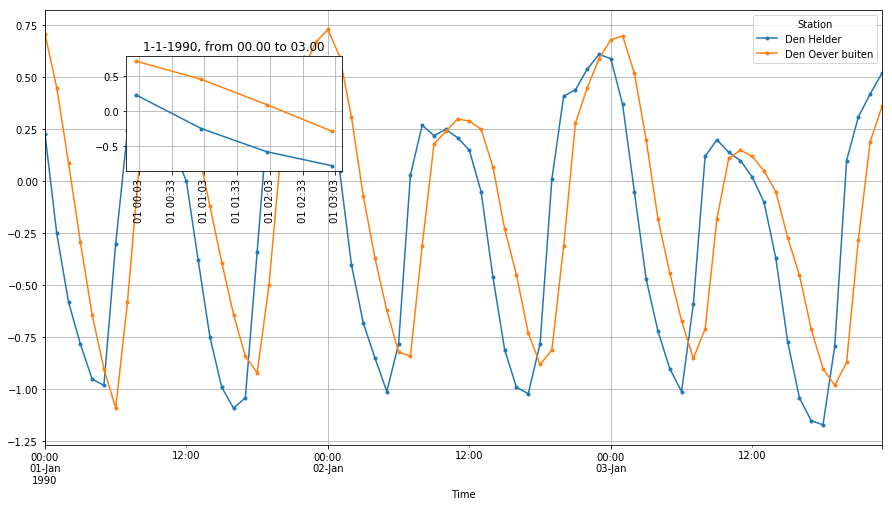

In [303]:
waterlevel_h['1-1-1990':'1-3-1990'].plot(marker='.',figsize=(15,8))
plt.grid(True)
plt.axes([.2, .6, .2, .2])
plt.plot(waterlevel_h['1-1-1990 00:00:00':'1-1-1990 03:00:00'],marker='.')
plt.title('1-1-1990, from 00.00 to 03.00')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.savefig('../figures/water_levels_hour.tiff')

In [304]:
print('Water level data availability: \n from ' + str(waterlevel.index[0]) +'\n to '+ str(waterlevel.index[-1]))

Water level data availability: 
 from 1921-01-01 02:40:00
 to 2017-12-31 23:59:00


In [305]:
waterlevel_h[waterlevel_h>10**4]=np.nan 


In [306]:
waterlevel_h = waterlevel_h['1950':'2018']


In [324]:
waterlevel_h = waterlevel_h[['Den Helder']]
waterlevel_h.columns = ['sea level']

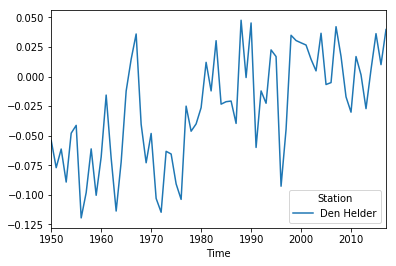

In [309]:
yearly_wl_mean = waterlevel_h.groupby(waterlevel_h.index.year).mean()
yearly_wl_mean.plot()

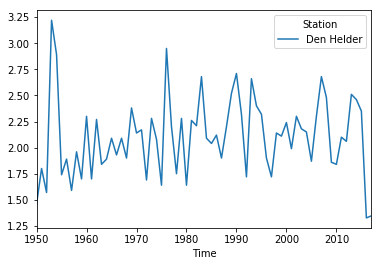

In [310]:
yearly_wl_max = waterlevel_h.groupby(waterlevel_h.index.year).max()
yearly_wl_max.plot()

## KNMI Meteorological data

Meterological data are available from the [KNMI data website](http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi)

Select the following variables (variable code in parenthesis)
* Wind direction (**DDVEC**), in degrees
* Wind speed, average (**FHVEC**), in 0.1 m/s
* Wind speed, hourly max (**FHX**), in 0.1 m/s
* Average Temperature (**FHX**), in 0.1 Celsius
* Precipitation (**RH**), in 0.1 mm (-1 voor <0.05 mm)
* Potential Evaporation (**EV24**), in 0.1 mm (Referentiegewasverdamping, Makkink)


at the station of interest (**De Kooy**, id 235, and **De Bilt**, id 260), for the available period, i.e. 1950-2017.

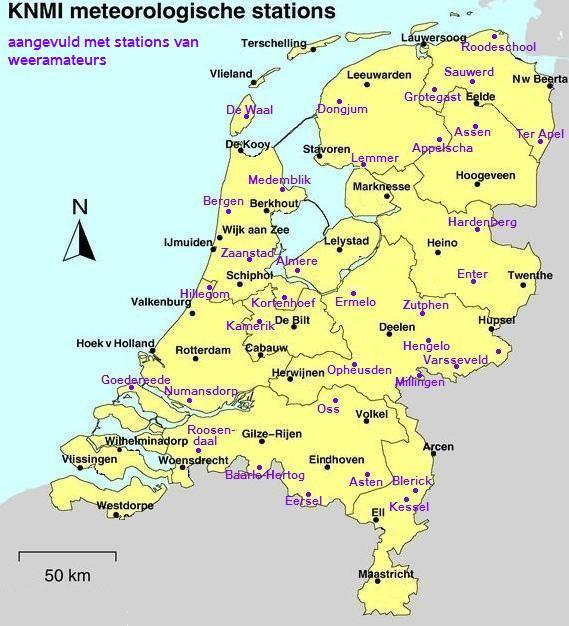

In [24]:
Image('../figures/Ijsselmeer/map_stations.jpg',width=600)


Map of Available KNMI stations

____
Explain here the criteria for the selection of the station. 

In [206]:
meteo_data_file = 'KNMI_data.txt'
raw_meteo_data = pd.read_csv('../data/Ijsselmeer/'+meteo_data_file,\
                                 header=16, 
                                 index_col= 1,\
                                 skiprows=[17],\
                                 parse_dates =[1],\
                                 na_values=['     '])

In [207]:
raw_meteo_data.columns = ['Station','Wind direction','Wind speed, average','Wind speed, hourly max','Temperature','Precipitation','Potential evaporation']

In [327]:
# unit change, from raw to metrical system
raw_meteo_data_corrected = pd.DataFrame()
raw_meteo_data_corrected['wind speed, average'] = raw_meteo_data['Wind speed, average'] / 10 # from 0.1 m/s to m/s
raw_meteo_data_corrected['wind speed, hourly max'] = raw_meteo_data['Wind speed, hourly max'] / 10 # from 0.1 m/s to m/s
raw_meteo_data_corrected['temperature'] = raw_meteo_data['Temperature'] / 10 # from 0.1 C to C
raw_meteo_data_corrected['precipitation'] = raw_meteo_data['Precipitation'] / (10*1000)  # from 0.1 mm to mm
raw_meteo_data_corrected['potential evaporation'] = raw_meteo_data['Potential evaporation'] / (10*1000) # from 0.1 mm to mm
raw_meteo_data_corrected['Station'] = raw_meteo_data['Station']
raw_meteo_data_corrected['wind direction'] = raw_meteo_data['Wind direction']

In [328]:
meteo_data={}
meteo_data['De Bilt']=raw_meteo_data_corrected[raw_meteo_data_corrected['Station']==260].drop('Station', axis=1)
meteo_data['De Kooy']=raw_meteo_data_corrected[raw_meteo_data_corrected['Station']==235].drop('Station', axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x21b228128>,
      dtype=object)

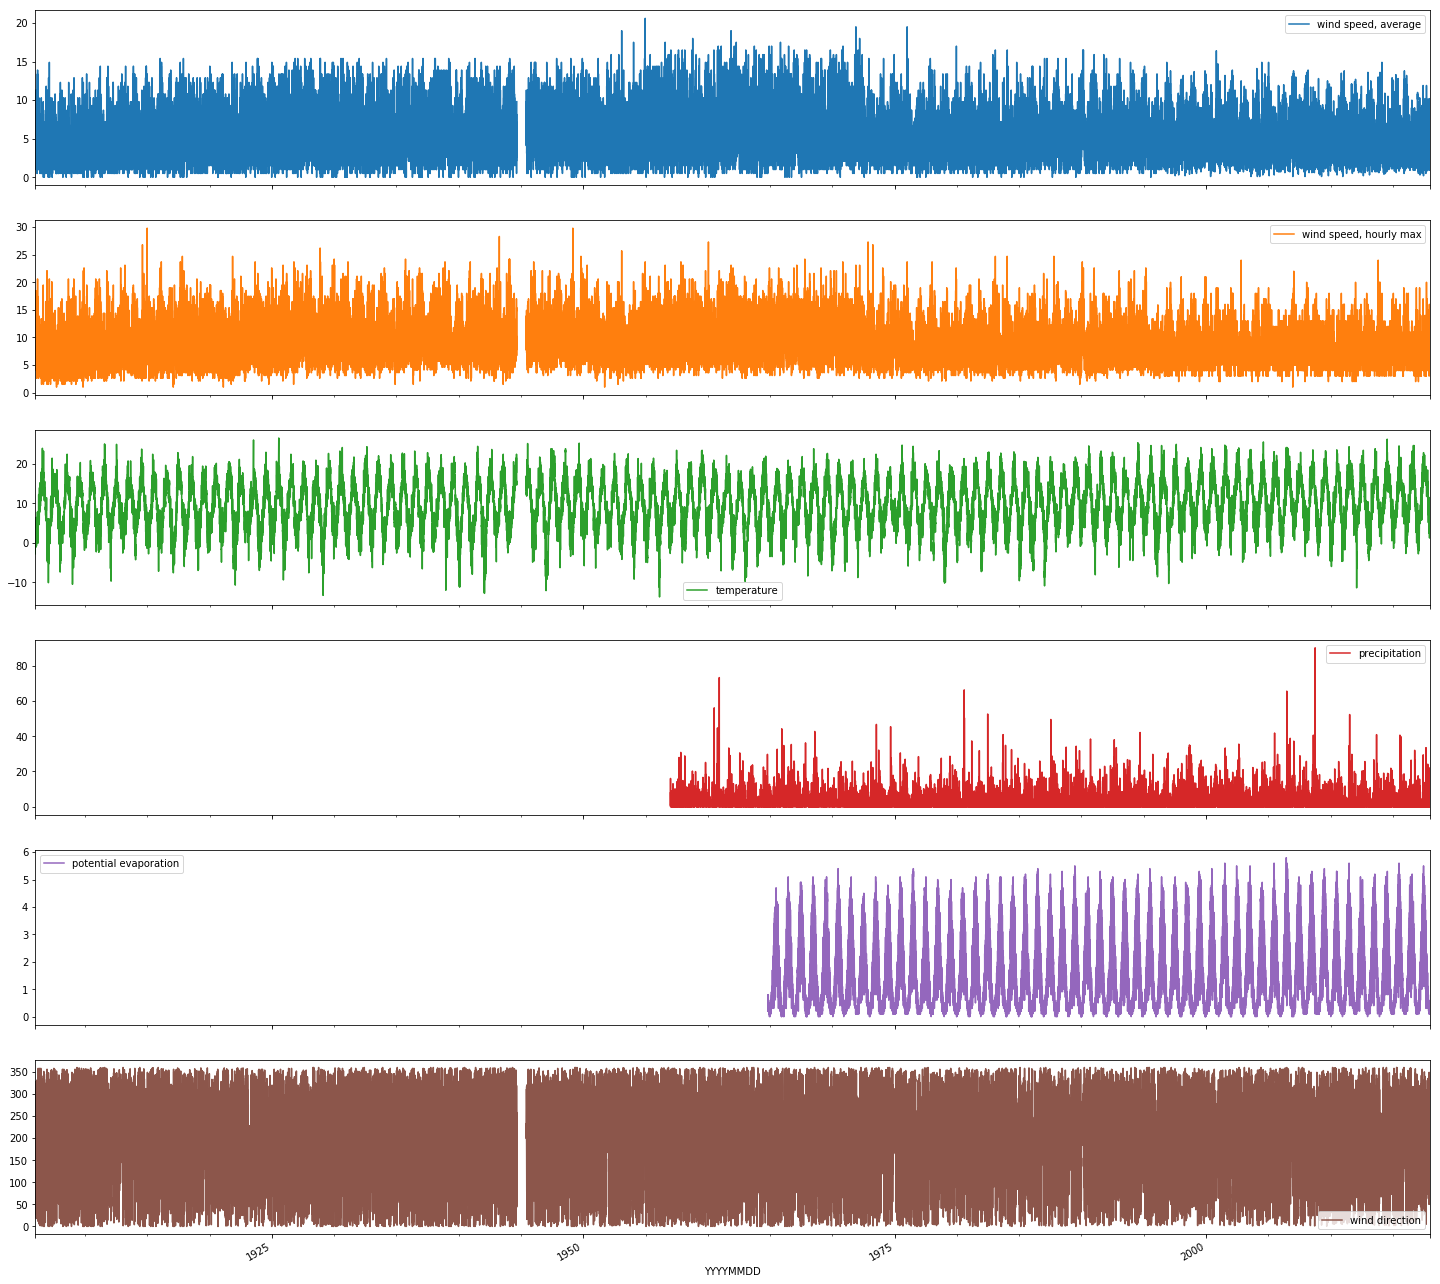

In [317]:
meteo_data['De Kooy'].plot(figsize=(25,25),subplots=True)

In [329]:
de_kooy_h = meteo_data['De Kooy'].resample('H').bfill()

In [330]:
de_kooy_h.to_csv('../data/Ijsselmeer/meteo_data_de_kooy_h.csv')

In [331]:
forcings = de_kooy_h.join(inflow_ijssel_h).join(waterlevel_h)

In [333]:
forcings.describe()

,"wind speed, average","wind speed, hourly max",temperature,precipitation,potential evaporation,wind direction,inflow ijssel,sea level
count,975169.000000,975097.000000,975217.000000,534720.000000,466056.000000,975169.000000,946705.000000,595985.000000
mean,5.587403,9.149511,9.470273,0.002087,0.001630,193.423525,446.053958,-0.026573
std,3.056352,3.676719,5.873073,0.004327,0.001382,95.937876,230.670475,0.577953
min,0.000000,1.000000,-13.700000,-0.000100,0.000000,0.000000,115.000000,-2.500000
25%,3.100000,6.200000,5.300000,0.000000,0.000400,109.000000,293.800000,-0.520000
50%,5.100000,8.700000,9.400000,0.000100,0.001200,213.000000,392.000000,0.070000
75%,7.600000,11.300000,14.300000,0.002300,0.002600,265.000000,523.000000,0.420000
max,20.600000,29.800000,26.500000,0.090200,0.005800,360.000000,2600.000000,3.220000


In [332]:
forcings.to_csv('../data/Ijsselmeer/forcings.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2cbcafd68>,
      dtype=object)

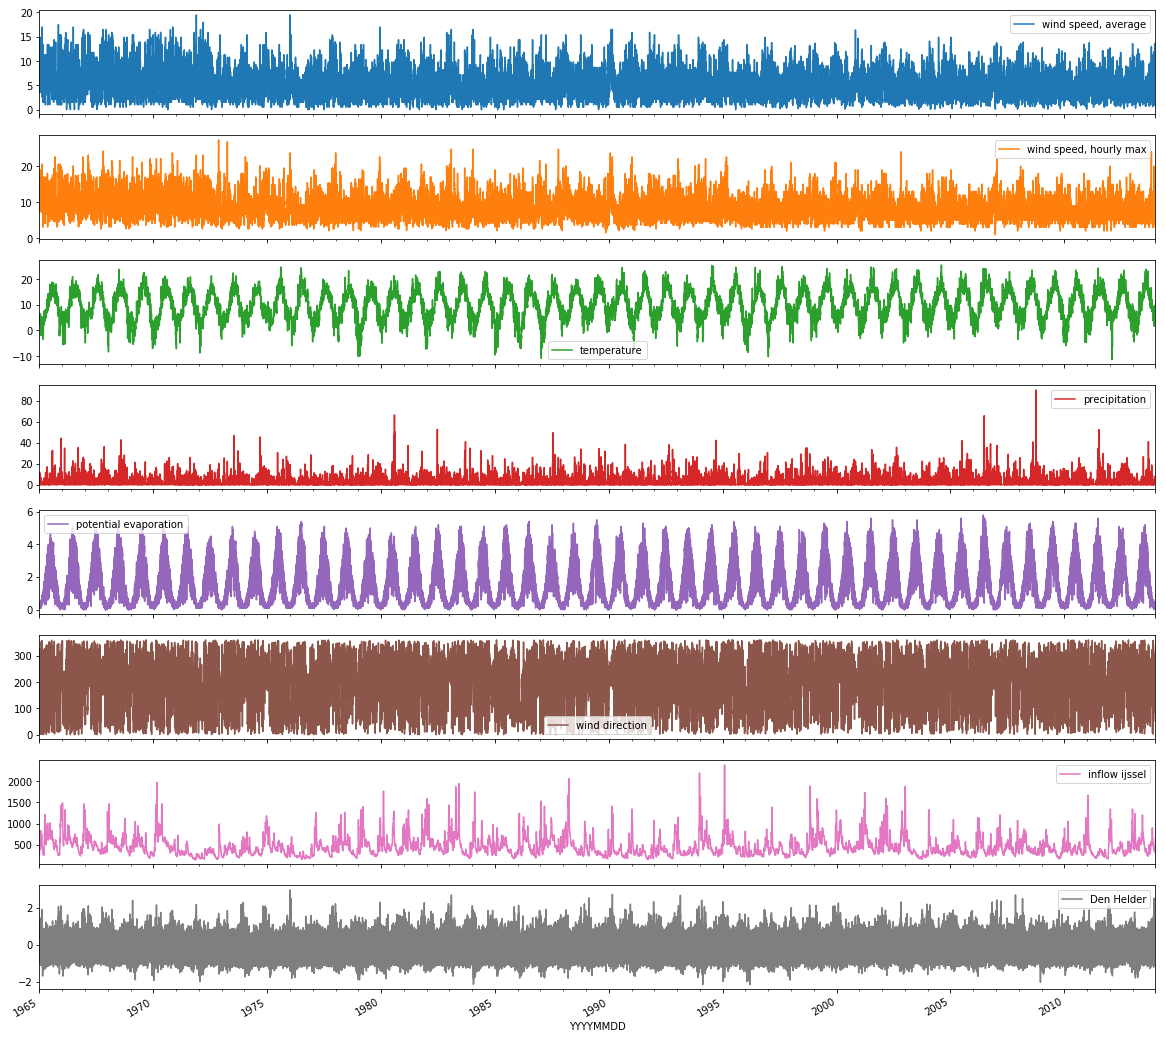

In [322]:
forcings['1965':'2013'].plot(subplots=True,figsize=(20,20))